# REMINDER: all Packages must be here at the top, not in the individual code cells

### <center>**Appendix**</center>

In [3]:
### Python Packages used throughout the notebook: ###

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder #, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score)
from sklearn.tree import plot_tree

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import trim_mean
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)
from sklearn.tree import plot_tree

###removing scientific notation###
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
### Connection info for GitHub File ### 
url = 'https://github.com/TexasTori/502_group4/raw/47991b001ffd176ab156b992140cb9d3d3a51df1/Group_4_Data.csv'

### Loading Data for Game scores and descriptions ###
data = pd.read_csv(url, encoding='latin-1')

### Set up to automate files print location for team ###
cwd = os.getcwd() 
log_prefix = os.path.join(cwd,'log_files')
print(log_prefix)

/Users/bobbymarriott/Documents/GitHub/502_group4/log_files


## DELETE cell below befor attaching to paper

In [5]:
### Example of how to print using os module: ###
# Define the file name
file_name = 'output.csv'

# Create the full file path
file_path = os.path.join(log_prefix, file_name)

# Creating a dictionary with fake data
df_data = {
    'Name': ['John', 'Alice', 'Bob'],
    'Age': [30, 25, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

# Creating the DataFrame
df_example = pd.DataFrame(df_data)

# Save the DataFrame to a CSV file
df_example.to_csv(file_path, index=False)

# Print the full file path
print("CSV file saved at:", file_path)

CSV file saved at: /Users/bobbymarriott/Documents/GitHub/502_group4/log_files/output.csv


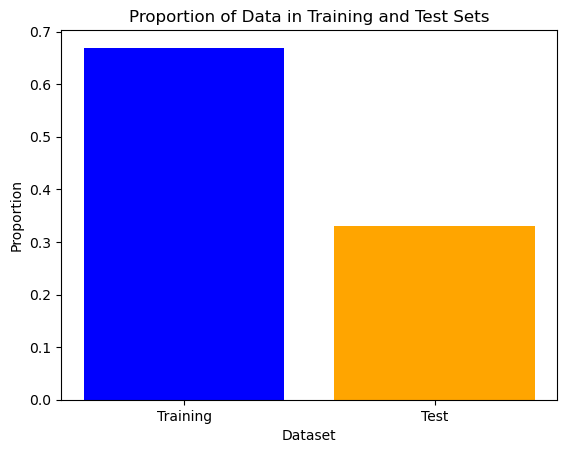

In [6]:
#SPLITTING EXAMPLE FROM MODULE 3
#Python Answer
#creating the train and test sets.  33% for the test.
data_train, data_test = train_test_split(data, test_size = 0.33, random_state = 7)

data.shape
data_train.shape
data_test.shape

#Calculate proportions
train_proportion = len(data_train) / len(data)
test_proportion = len(data_test) / len(data)

#Create a bar graph to confirm proportions
proportions = [train_proportion, test_proportion]
labels = ['Training', 'Test']

plt.bar(labels, proportions, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Proportion')
plt.title('Proportion of Data in Training and Test Sets')
plt.show()

In [6]:
### Inspect data ###
data.head()

,ID,ESA2008,ESA2009,ESA2010,ESA2011,ESA2012,ESA2013,ESA2014,ESA2015,ESA2016,...,Protagonist,MainPC,PCTYPE,CharacterPrespective,Narrative,DigitalGameMainGenre,DigitalGameSecondaryGenre,DigitalGameThirdGenre,DigitalGameGenreOTHER,MetaCritic Review Score
0,1,0,0,0,0,0,0,0,0,0,...,0,Slide,3,2,0,Action,,,,NaN
1,2,0,0,0,0,0,0,0,0,0,...,NamelessAdventurer,0,0,0,1,TextAdventure,,,,NaN
2,3,0,0,0,0,0,0,0,0,0,...,0,LaserCannon,0,2,0,Shooter,Arcade,,,NaN
3,4,0,0,0,0,0,0,0,0,0,...,Adventurer(Adventure),adventurer,3,3,1,ActionAdventure,,,,NaN
4,5,0,0,0,0,0,0,0,0,0,...,Kazuya,Multiple,3,7,1,Roguelike,,,,NaN


**Business Question:** How can we leverage a model to identify video games that are highly likely to receive critical acclaim, enabling us to allocate our marketing resources effectively and maximize the success of our titles?

### Exploratory Data Analysis (EDA)

In [7]:
### Checking for any NAN cells ###
data.isnull().sum()

ID                            0
ESA2008                       0
ESA2009                       0
ESA2010                       0
ESA2011                       0
ESA2012                       0
ESA2013                       0
ESA2014                       0
ESA2015                       0
ESA2016                       0
ESA2017                       0
ESA2018                       0
ESACount                      0
EuroGamer                     0
GamesRadar                    0
Guardien                      0
IGN                           0
MetaCritic                    0
Polygon                       0
TIME                          0
CriticCount                   0
TotalCitationsCount           0
DigitalGame                   0
Year                          0
YearInterval                  0
Series                        0
Mode                          0
SpatialDimensionality         0
Platformscount                1
Protagonist                   0
MainPC                        0
PCTYPE  

In [8]:
data.dtypes

ID                             int64
ESA2008                        int64
ESA2009                        int64
ESA2010                        int64
ESA2011                        int64
ESA2012                        int64
ESA2013                        int64
ESA2014                        int64
ESA2015                        int64
ESA2016                        int64
ESA2017                        int64
ESA2018                        int64
ESACount                       int64
EuroGamer                      int64
GamesRadar                     int64
Guardien                       int64
IGN                            int64
MetaCritic                     int64
Polygon                        int64
TIME                           int64
CriticCount                    int64
TotalCitationsCount            int64
DigitalGame                   object
Year                           int64
YearInterval                  object
Series                        object
Mode                           int64
S

In [9]:
data.describe()

,ID,ESA2008,ESA2009,ESA2010,ESA2011,ESA2012,ESA2013,ESA2014,ESA2015,ESA2016,...,TIME,CriticCount,TotalCitationsCount,Year,Mode,Platformscount,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
count,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,393.00,...,393.00,393.00,393.00,393.00,393.00,392.00,393.00,393.00,393.00,354.00
mean,197.00,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.13,1.22,1.77,2006.21,2.24,4.86,2.59,2.51,0.69,86.40
std,113.59,0.20,0.20,0.21,0.22,0.22,0.22,0.22,0.22,0.23,...,0.33,1.28,1.33,9.41,0.98,3.96,1.37,1.33,0.46,8.57
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1972.00,0.00,0.00,0.00,0.00,0.00,42.00
25%,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,2001.00,1.00,2.00,2.00,1.00,0.00,83.00
50%,197.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,2009.00,3.00,4.00,3.00,3.00,1.00,88.00
75%,295.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.00,2.00,2013.00,3.00,7.00,3.00,3.00,1.00,93.00
max,393.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,6.00,11.00,2020.00,3.00,37.00,5.00,7.00,1.00,99.00


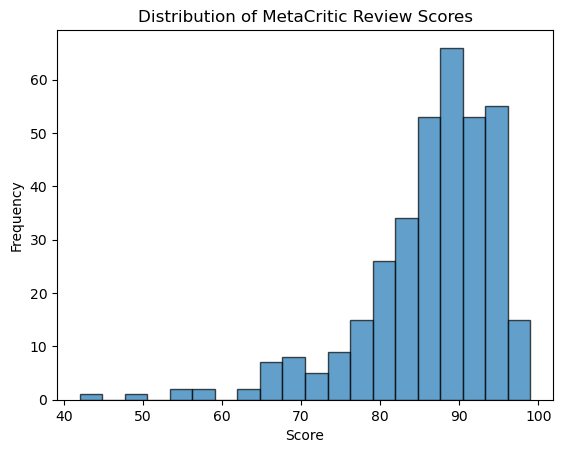

In [10]:
### Histogram of the Target Feature MetaCritic Review Score ###

plt.hist(data['MetaCritic Review Score'].dropna(), bins=20, edgecolor='black', alpha = 0.7)
plt.title('Distribution of MetaCritic Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Upon reviewing our Target value, MetaCritic Review Score, we have observed that our data is heavily left-skewed, and scores lower than 40 are absent. This finding indicates that the dataset may not represent the entire population, and there could be a potential bias in the data. However, for the purpose of this project, we are continuing to test the idea that MetaCritic Review Score can be predicted based on the games and features provided. 

In [12]:
## Age is below, midway

### Scatterplot to see relationship between Age and Score ###

plt.scatter(data['Age'], data['MetaCritic Review Score'])
plt.title('MetaCritic Review Score vs Age')
plt.xlabel('Age')
plt.ylabel('MetaCritic Review Score')

### Print out ###
plt.show()

KeyError: 'Age'

Upon analyzing the scatter plot depicting the correlation between age and score, our findings indicate a negligible relationship between the two variables. Based on the data, it can be concluded that age does not significantly impact the score.

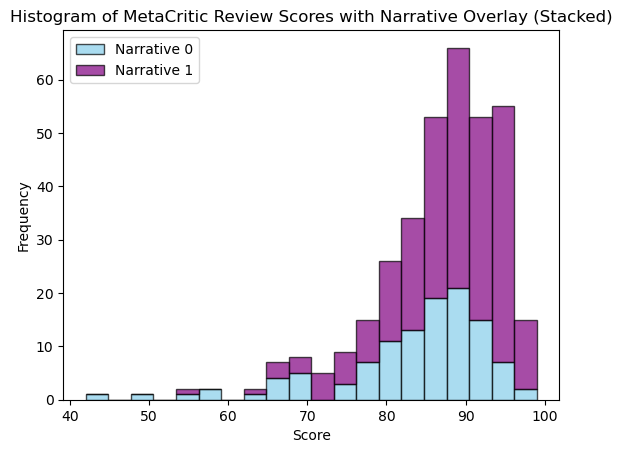

In [11]:
### MetaCritic Review Scores for Narrative 0 and 1 ###
scores_narr0 = data[data['Narrative'] == 0]['MetaCritic Review Score']
scores_narr1 = data[data['Narrative'] == 1]['MetaCritic Review Score']

### Define bins for the histogram ###
bins = 20

### Plot the histogram for Narrative 0 and Narrative 1 ###
plt.hist([scores_narr0, scores_narr1], bins=bins, edgecolor='black', 
         color=['skyblue', 'purple'], alpha=0.7, stacked=True, 
         label=['Narrative 0', 'Narrative 1'])

plt.title('Histogram of MetaCritic Review Scores with Narrative Overlay (Stacked)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

### Print out ###
plt.show()

/var/folders/48/g22yl3r57qx5j4grhmnwc59h0000gn/T/ipykernel_33112/3625898111.py:12: RuntimeWarning: invalid value encountered in divide
  n_norm = np.column_stack((hist_narr0, hist_narr1)) / np.sum(np.column_stack((hist_narr0, hist_narr1)),


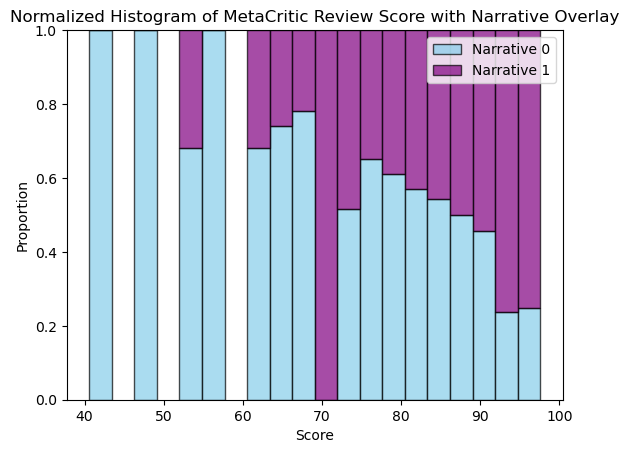

In [12]:
### Setting Bins for Normalized chart ###
num_bins = 20
bins = np.linspace(data['MetaCritic Review Score'].min(), data['MetaCritic Review Score'].max(), num_bins + 1)
ourbins = np.column_stack((bins[:-1], bins[1:]))


### Compute histogram data for each narrative category ###
hist_narr0, _ = np.histogram(scores_narr0, bins=bins, density=True)
hist_narr1, _ = np.histogram(scores_narr1, bins=bins, density=True)

### Normalize histogram data ###
n_norm = np.column_stack((hist_narr0, hist_narr1)) / np.sum(np.column_stack((hist_narr0, hist_narr1)), 
                                                            axis=1)[:, None]


### Plot normalized histogram with narrative overlay ###
plt.bar(x=ourbins[:,0], height=n_norm[:,0], width=ourbins[:,1]-ourbins[:,0], color="skyblue", alpha=0.7, edgecolor='black')
plt.bar(x=ourbins[:,0], height=n_norm[:,1], width=ourbins[:,1]-ourbins[:,0], bottom=n_norm[:,0], color="purple", alpha=0.7, edgecolor='black')

plt.legend(['Narrative 0', 'Narrative 1'])
plt.title('Normalized Histogram of MetaCritic Review Score with Narrative Overlay')
plt.xlabel('Score')
plt.ylabel('Proportion')

### Print out ###
plt.show()

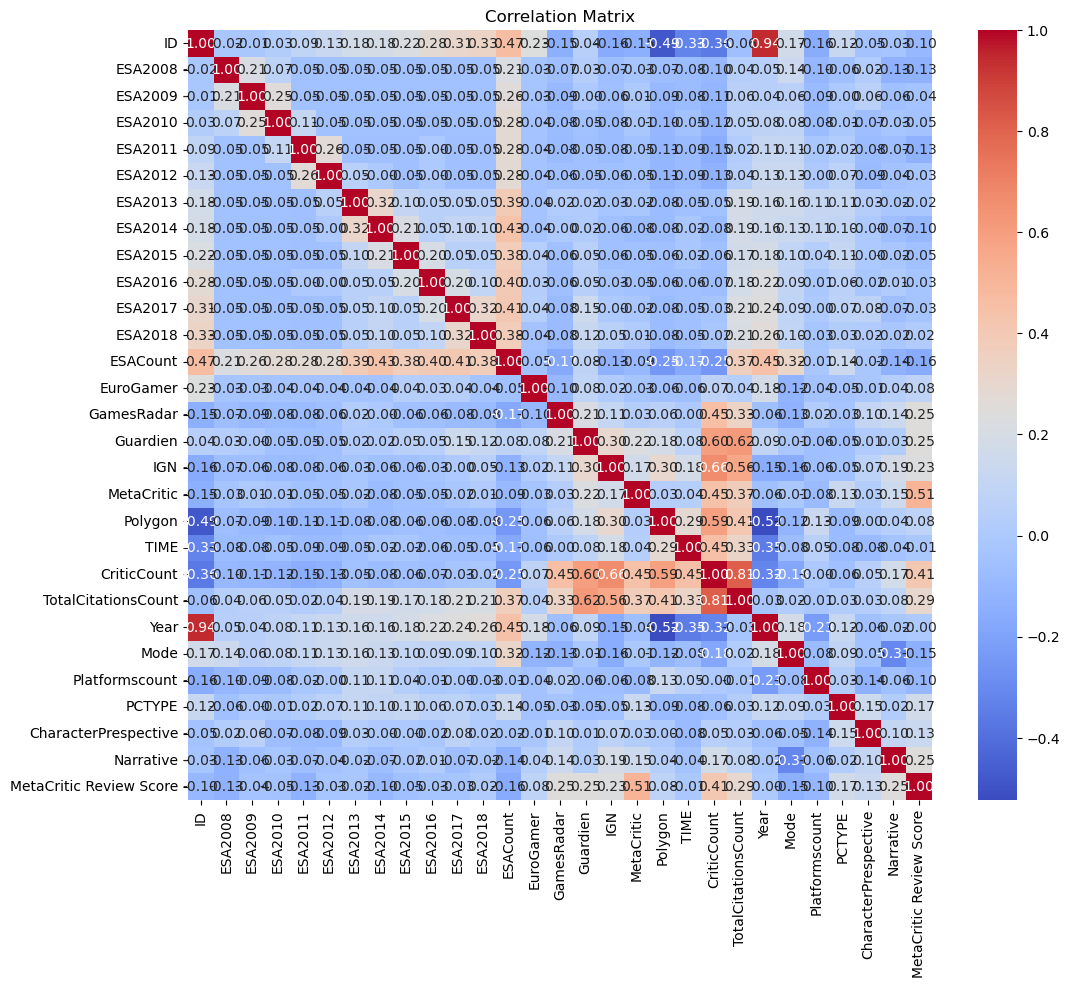

In [13]:

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

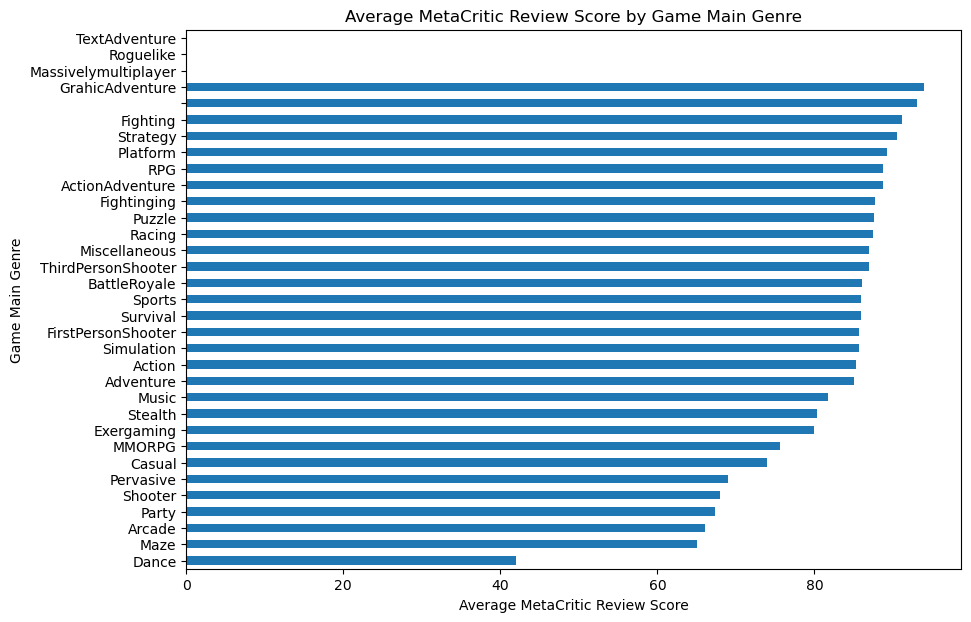

In [14]:
# Calculate average score per main genre
genre_scores = data.groupby('DigitalGameMainGenre')['MetaCritic Review Score'].mean().sort_values()

# Plotting the bar chart
genre_scores.plot(kind='barh', figsize=(10, 7))
plt.title('Average MetaCritic Review Score by Game Main Genre')
plt.xlabel('Average MetaCritic Review Score')
plt.ylabel('Game Main Genre')
plt.show()


/Users/bobbymarriott/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bobbymarriott/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bobbymarriott/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


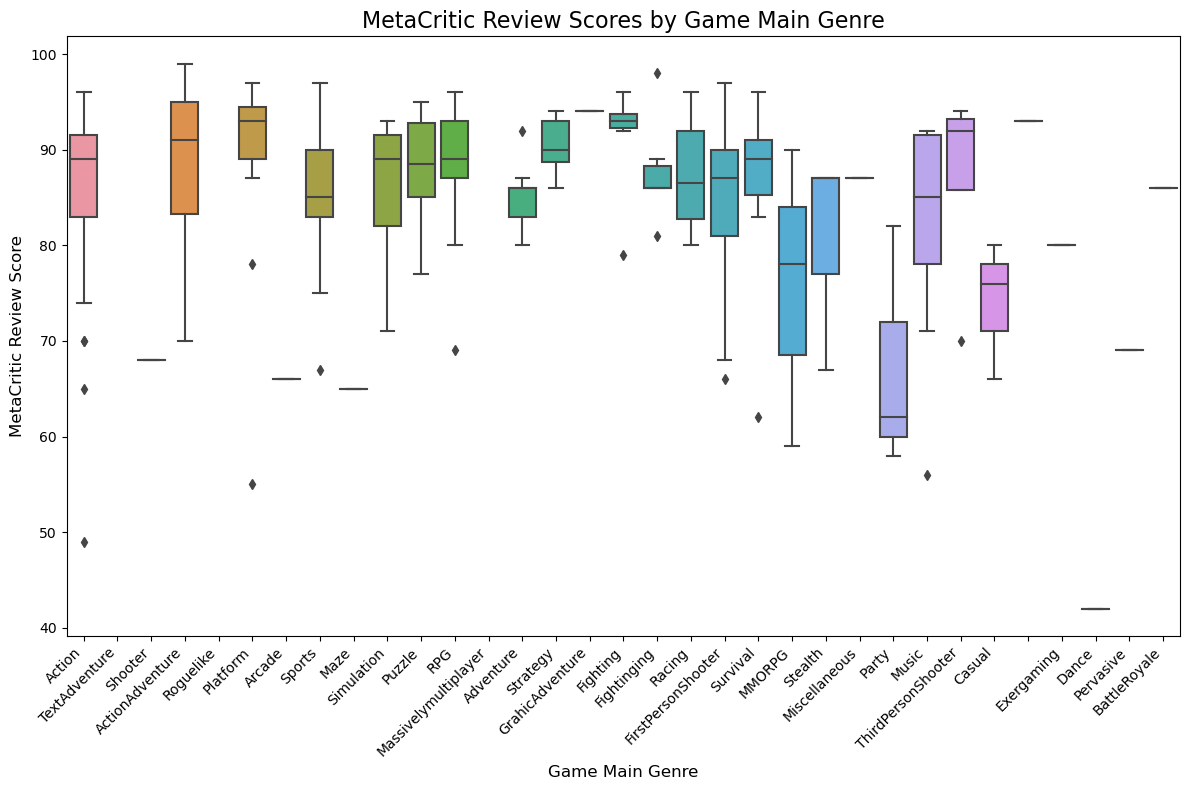

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 8))  

# Create the boxplot with rotated labels for better readability
sns.boxplot(x='DigitalGameMainGenre', y='MetaCritic Review Score', data=data)

# Improve the readability of the x labels
plt.xticks(rotation=45, ha='right')  # 'ha' is the same as horizontalalignment

# Set the title and labels with a larger font for clarity
plt.title('MetaCritic Review Scores by Game Main Genre', fontsize=16)
plt.xlabel('Game Main Genre', fontsize=12)
plt.ylabel('MetaCritic Review Score', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [21]:
## Age again, midway
### PATRICIO - by the end of your work we will have the data only to the following-ish columns 
# (we can remove more if you see something during EDA) ###

selected_columns = ['Year', 'Series', 'Mode', 
                    'SpatialDimensionality', 'PCTYPE', 
                    'CharacterPrespective', 'Narrative', 
                     'MetaCritic Review Score']

# Subset the DataFrame
subset_data = data[selected_columns]
subset_data = subset_data.sort_values(by='SpatialDimensionality', ascending=True)


# Display the subset DataFrame
subset_data.head(20)

,Year,Series,Mode,SpatialDimensionality,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score
351,2016,1,2,1,0,0,0,69.00
290,2013,1,3,1,0,0,0,79.00
275,2012,1,3,1,3,4,1,78.00
350,2016,1,3,1,1,5,1,87.00
295,2013,1,3,1,3,5,1,87.00
296,2013,1,3,1,3,5,1,88.00
153,2006,1,1,1,3,4,1,89.00
72,1998,1,3,1,0,2,1,88.00
269,2012,1,3,1,0,0,0,77.00
196,2009,1,3,1,0,5,0,80.00


In [18]:
### Drop rows that are missing MetaCritic Score ###

### Handle Missing record in Platformscount ###

### Turn Series column into a 0/1 if it contains a value <> 0 then 1 ###

### Convert Year into age? ###

In [22]:
### Drop rows that are missing MetaCritic Score ###
data = data.dropna(subset=['MetaCritic Review Score'])


To maintain the integrity of our data and ensure accurate model training, we decided to remove the 39 instances that were missing the MetaCritic score, as this is our target field. Imputing values in this situation could potentially introduce false information and compromise the reliability of our results. This approach aligns with sound academic principles of data analysis and modeling.

In [23]:
### New feature called Age ###
current_year = pd.to_datetime('now').year
data['Age'] = current_year - data['Year']

We changed the variable from year to age to evaluate its impact on game scores.

In [24]:
### Changing Series field into bianary 0/1 ###
data['Series'] = data['Series'].apply(lambda x: 0 if x == 0 or x == '0' else 1)
print("Series Column Preview:")
print(data['Series'])

Series Column Preview:
6      1
7      1
9      1
10     0
11     0
      ..
388    1
389    0
390    1
391    0
392    1
Name: Series, Length: 354, dtype: int64


Series was converted to binary value to see if a game being a part of an established series positively or negatively impacted the Metacritic score. 

### Standardization and Normalization

In [25]:
### Z-score section - for the K-Means

### Encoded section - linear Regression

In [26]:
#### TORI SECTION TO Standardize columns ###
categorical_columns = ['SpatialDimensionality']
data_encode = subset_data.copy() 

for column in categorical_columns:
    one_hot_encoded = pd.get_dummies(data_encode[column], prefix=column)
    data_encode = pd.concat([data_encode, one_hot_encoded], axis=1)

data_encode.drop(columns=categorical_columns, inplace=True)  # Drop original categorical columns

data_encode.head()
### data_encode is for the Linear Regression Model ###

,Year,Series,Mode,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
351,2016,1,2,0,0,0,69.00,True,False,False
290,2013,1,3,0,0,0,79.00,True,False,False
275,2012,1,3,3,4,1,78.00,True,False,False
350,2016,1,3,1,5,1,87.00,True,False,False
295,2013,1,3,3,5,1,87.00,True,False,False


In [27]:
### Formatting everything in Z-score ###  KMeans 

numeric_data = subset_data.select_dtypes(include='number').drop(columns=['MetaCritic Review Score'])
column_names = numeric_data.columns.tolist()

df_zscore = pd.DataFrame(stats.zscore(numeric_data), columns=column_names)

### Print out ###
df_zscore.head()

,Year,Series,Mode,PCTYPE,CharacterPrespective,Narrative
351,1.05,0.33,-0.30,-1.91,-1.90,-1.46
290,0.65,0.33,0.73,-1.91,-1.90,-1.46
275,0.52,0.33,0.73,0.28,1.22,0.68
350,1.05,0.33,0.73,-1.18,2.00,0.68
295,0.65,0.33,0.73,0.28,2.00,0.68



**Z-score normalization (Standardization):** KMEANS
Suitable for algorithms that assume normally distributed data, such as linear regression, logistic regression, and neural networks.
It is robust to outliers and works well when the standard deviation of features is different.


1. Project Definition: Consider what specific metrics will define 'playability' or 'acclaim'—user ratings, hours played, critic scores, etc. Or is there a target variable that defines this for your? Your analysis will depend heavily on these definitions

Highly Playable variables: Mode (single player, multiplayer, MMO), Spatial Dimensionality (2-d, 3-d), Platform count, Character Perspective, Narrative, Digital Game Main Genre, Critic Scores 

Reflect on how the different performance metrics will guide business decisions. For example, if your model has **high precision**, it could be particularly useful in identifying games that are certain to receive acclaim, guiding marketing efforts to focus resources on these titles.

Conversely, a model with high recall could prevent overlooking games that could become highly playable, informing strategies to ensure broad coverage in promotional activities.

2. Data Exploration: Conduct a thorough exploratory data analysis to understand the variables at your disposal. For games, variables can be interdependent in complex ways. Player reviews might correlate with playtime, and genre might influence critical acclaim.

Patricio - EDA <br>
Tori - Cleaning Normalizing/standarizing - to prep for models -   Logigstic Add KMEANS<br>
-mod 3/4 training and testing data split.<br>
-Feature selection<br> Lift?
the model with the highest precision - CART/C5.0 & NB

3. Modeling Pathway: Given the binary nature of your classification problem, you might start with logistic regression to establish a baseline. As you progress, explore tree-based models or random forest or even neural networks that could capture more subtle patterns within your data. 4. Model Evaluation: Alongside standard classification metrics such as accuracy, precision, recall, consider the specific nature of your project's objectives.

# Logistic Regression and summary

In [28]:
data_encode.corr()

,Year,Series,Mode,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
Year,1.00,-0.05,0.10,0.08,0.03,0.01,-0.00,0.03,-0.29,0.23
Series,-0.05,1.00,0.27,0.15,-0.02,0.06,-0.04,0.09,-0.26,0.17
Mode,0.10,0.27,1.00,0.07,-0.03,-0.30,-0.15,0.00,-0.20,0.17
PCTYPE,0.08,0.15,0.07,1.00,0.14,0.01,0.17,-0.22,-0.11,0.23
CharacterPrespective,0.03,-0.02,-0.03,0.14,1.00,0.08,0.13,0.01,0.06,-0.05
Narrative,0.01,0.06,-0.30,0.01,0.08,1.00,0.25,-0.07,0.00,0.04
MetaCritic Review Score,-0.00,-0.04,-0.15,0.17,0.13,0.25,1.00,-0.22,-0.13,0.25
SpatialDimensionality_1,0.03,0.09,0.00,-0.22,0.01,-0.07,-0.22,1.00,-0.10,-0.53
SpatialDimensionality_2,-0.29,-0.26,-0.20,-0.11,0.06,0.00,-0.13,-0.10,1.00,-0.79
SpatialDimensionality_3,0.23,0.17,0.17,0.23,-0.05,0.04,0.25,-0.53,-0.79,1.00


In [29]:
### I think we might need to do Linear regression since our target variable is numberic and not bianary. 
### Linear Regression example. 
### I think we can keep Narritive, SpatialDimensionality, CharacterPrespective, 
# and a few of the genres had good corr scores. Maybe we need to consolidate them int less groups
# or only include the genres that has high scores?.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encode.drop(columns=['MetaCritic Review Score', 'Series', 'Mode', 'PCTYPE', 'CharacterPrespective'])
y = data_encode['MetaCritic Review Score']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Printing the coefficients (slope and intercept)
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

# Predicting values
predictions = model.predict(X_test)
print("Predictions:", predictions)

Slope: [-0.04479602  3.63413181 -2.65498882 -0.9973377   3.65232652]
Intercept: 171.21786888050684
Predictions: [88.73310623 83.85946192 88.50912614 84.65101424 81.34523058 88.95708632
 78.47808695 84.66579026 84.60621822 88.59871818 88.37473808 88.15075799
 88.59871818 88.46433012 84.47183017 85.00938239 88.46433012 84.51662618
 88.55392216 88.46433012 84.69581026 89.22586243 88.86749429 83.81466591
 84.5614222  84.87499433 85.09897442 88.64351419 83.59068581 84.74060628
 88.86749429 78.56767899 88.55392216 88.15075799 88.24035003 83.85946192
 78.47808695 84.51662618 88.10596197 88.10596197 88.10596197 84.12823803
 88.46433012 88.86749429 88.59871818 88.32994206 84.88977035 82.02262672
 83.85946192 85.09897442 85.09897442 85.14377044 89.09147438 88.10596197
 88.68831021 88.73310623 81.88823867 88.24035003 84.74060628 89.04667836
 84.35221813 80.22533012 88.50912614 84.74060628 88.15075799 88.32994206
 88.55392216 88.28514605 85.41254655 88.37473808 88.24035003]


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("R-squared:", round(r2, 2))
print("Mean Squared Error:", mse)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: 0.2
Mean Squared Error: 66.73130496648655
Coefficients: [-0.04479602  3.63413181 -2.65498882 -0.9973377   3.65232652]
Intercept: 171.21786888050684


In [31]:
data_encode.head()

,Year,Series,Mode,PCTYPE,CharacterPrespective,Narrative,MetaCritic Review Score,SpatialDimensionality_1,SpatialDimensionality_2,SpatialDimensionality_3
351,2016,1,2,0,0,0,69.00,True,False,False
290,2013,1,3,0,0,0,79.00,True,False,False
275,2012,1,3,3,4,1,78.00,True,False,False
350,2016,1,3,1,5,1,87.00,True,False,False
295,2013,1,3,3,5,1,87.00,True,False,False


# CART Model and summary

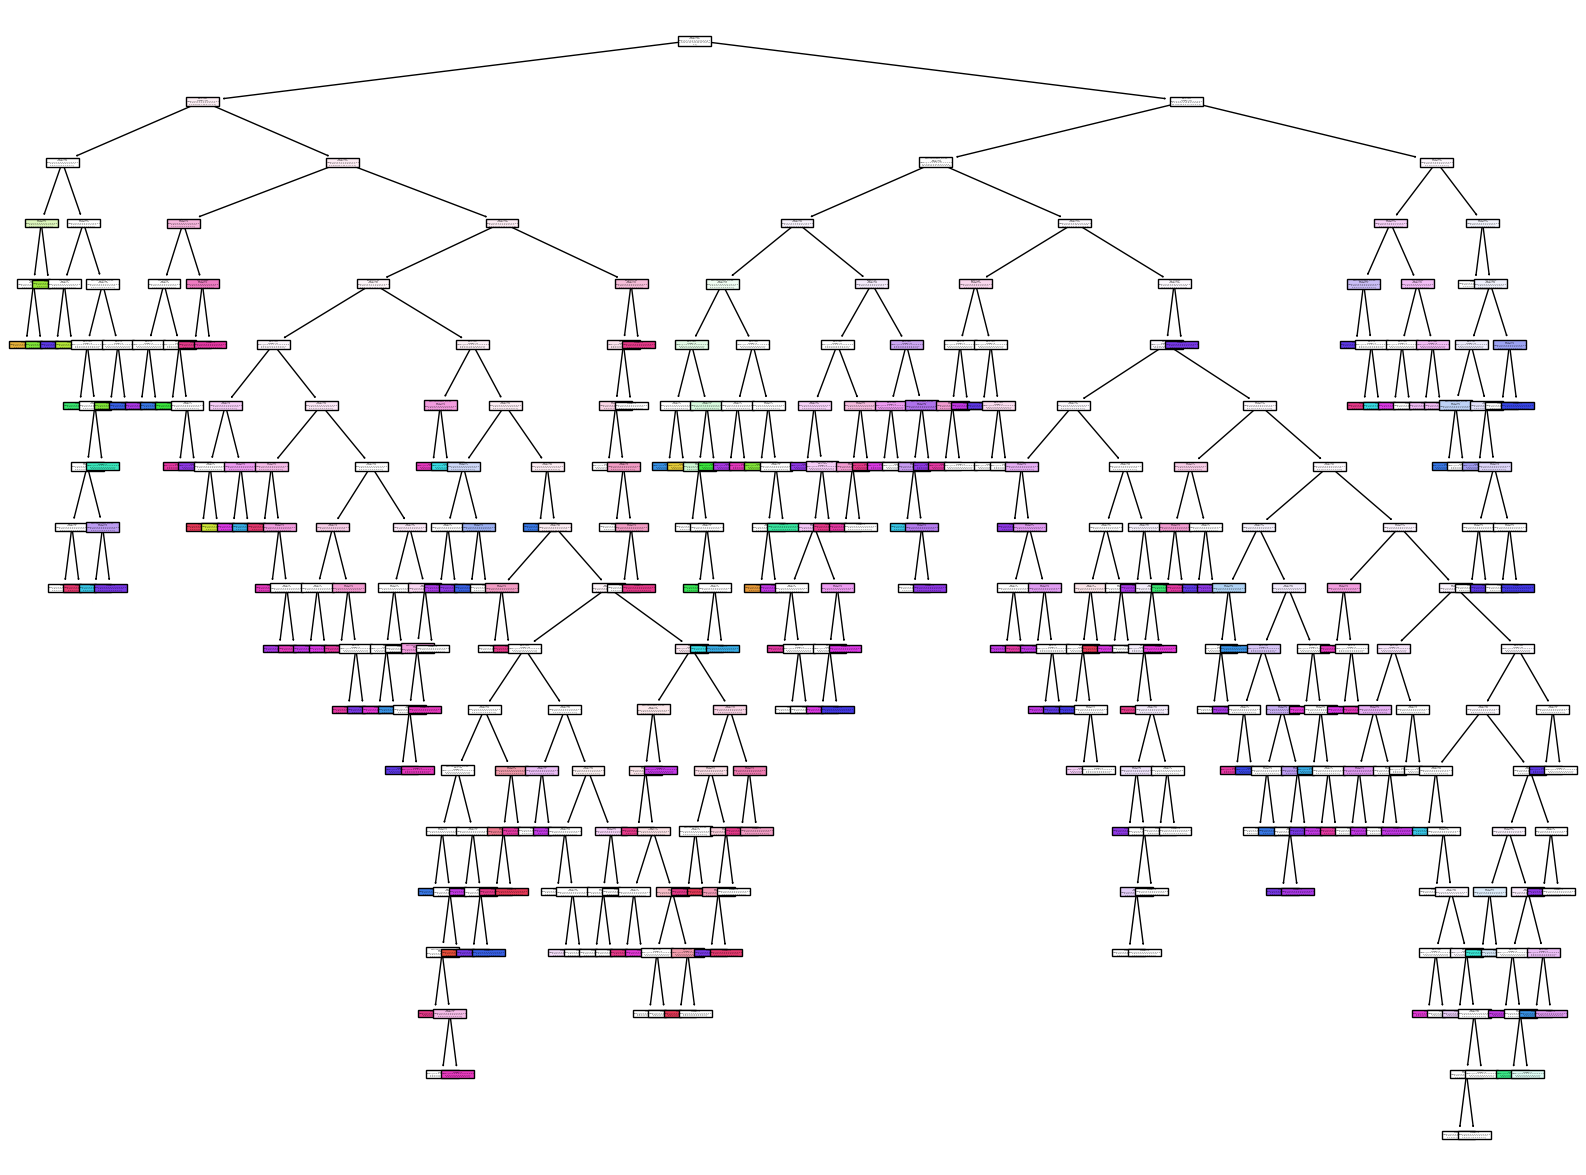

In [33]:
# Python
# EXAMPLE FROM MODULE 2/Will shape variables depending on final EDA
# X Age, Series, Mode, PCTYPE, Narrative, SpatialDimensionality_1, SpatialDimensionality_2, SpatialDimensionality_3, 
# Y Metacritic Review Score

# Assuming you have the dataset loaded into a DataFrame called df
# If your data is in a CSV file, you can load it like this:
# df = pd.read_csv('your_dataset.csv')

# Extracting features and target variable
X = data_encode[['Year', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality_1', 'SpatialDimensionality_2','SpatialDimensionality_3']]
y = data_encode['MetaCritic Review Score']

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the entire dataset
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=['Year', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality_1', 'SpatialDimensionality_2','SpatialDimensionality_3'], filled=True)
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming your CART model is already trained and stored in clf

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Mode
- PCTYPE
- Series


# Random Forest and summary

In [62]:
### I don't think we can use Naive Bayes bc it is for categorical data unless 
# we change the metacritic score to A, B, C, D, or F. We could do random forest or i 
# can change the scores to categories. Let me know. -Tori ###

In [35]:
# Random Forest Regressor Option
# With help from (Koehrsen, 2017) and (Bruce et al., 2020)
# Data Preprocessing
X = data[['Age', 'Series', 'Mode', 'PCTYPE', 'Narrative', 'SpatialDimensionality']]
y = data['MetaCritic Review Score']

# Train-Test Split ### Random State = square root of 4 = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the Random Forest Model ### n_estimators was found to hit accuracy plateau at 200
rf_model = RandomForestRegressor(n_estimators=200, random_state=2)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [36]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print Out
display(HTML("<u>Evaluation Metrics:</u>"))
print(f'Mean Squared Error: {round(mse, 3)}')
print(f'Mean Absolute Error: {round(mae, 3)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 3)}')
print(f'R-squared (R2) Value: {round(r2, 4)}')
print(f'Explained Variance Score: {round(evs, 4)}')

# Checking variables for importance
feature_importances = rf_model.feature_importances_
print('\nFeature Importances:', feature_importances)

Mean Squared Error: 72.892
Mean Absolute Error: 6.079
Root Mean Squared Error (RMSE): 8.538
R-squared (R2) Value: 0.1282
Explained Variance Score: 0.2006

Feature Importances: [0.5430368  0.02647478 0.07265338 0.15472022 0.08667226 0.11644257]


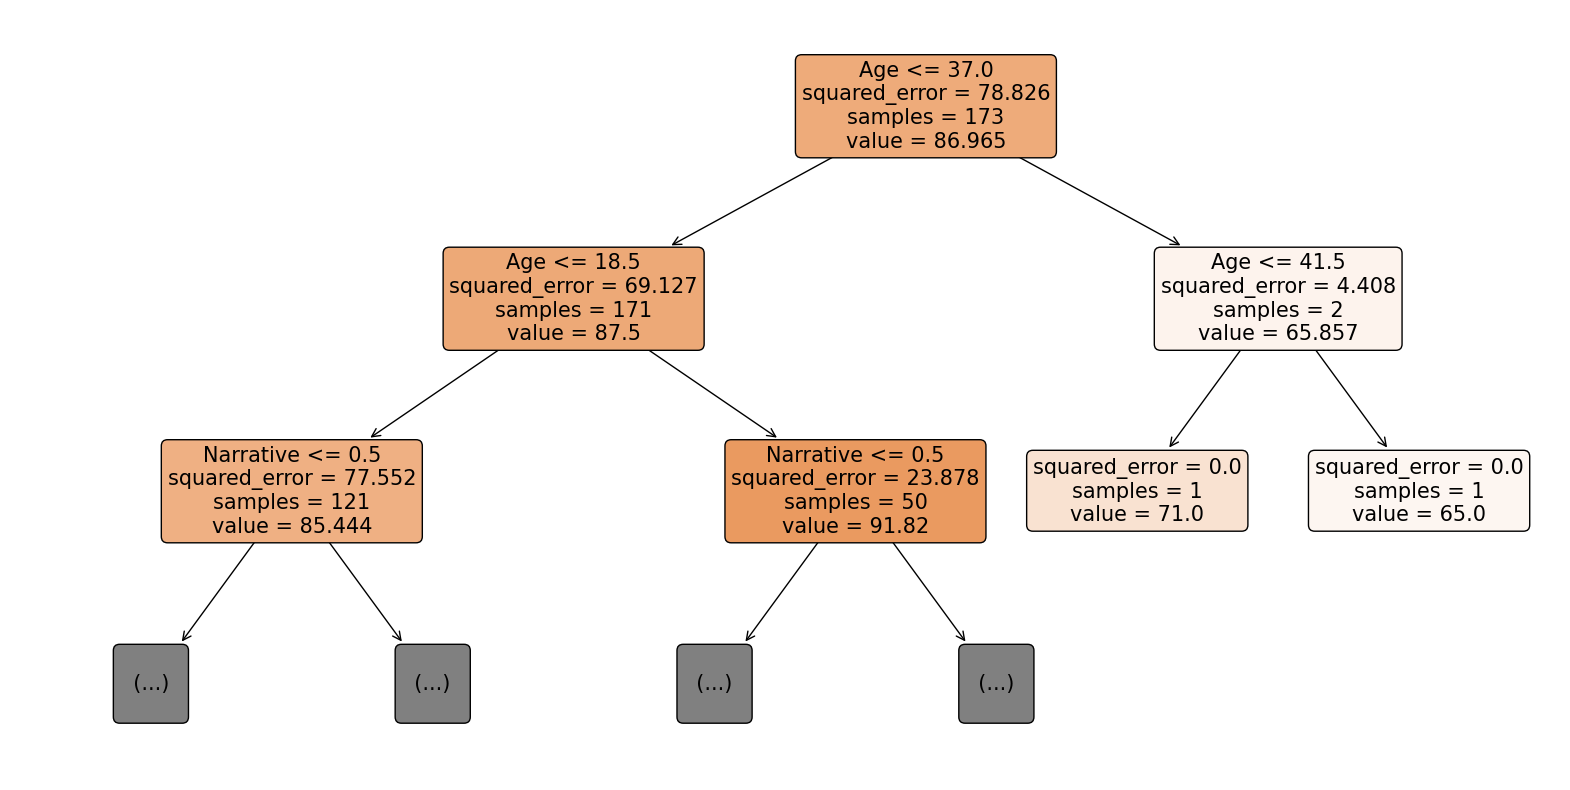

In [37]:
# With help from (Koehrsen, 2017)
# Tree viz option
tree_index = 0
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[tree_index], feature_names=X.columns.tolist(), 
          filled=True, rounded=True, max_depth=2, fontsize=15)


# Print out
display(HTML("<u>Example of Tree:</u>"))
plt.show()

## Model Evaluation Table

In [2]:
import pandas as pd
# Assuming you have results stored in dictionaries or variables like this:
# Replace these with your actual results
logistic_regression_results = {
    'Accuracy': 0.85,
    'Precision': 0.82,
    'Recall': 0.75,
    'F1 Score': 0.78
}

cart_results = {
    'Accuracy': 0.80,
    'Precision': 0.78,
    'Recall': 0.72,
    'F1 Score': 0.75
}

random_forest_results = {
    'Accuracy': 0.88,
    'Precision': 0.85,
    'Recall': 0.79,
    'F1 Score': 0.82
}

# Create a DataFrame to store the results
results_df = pd.DataFrame([logistic_regression_results, cart_results, random_forest_results],
                          index=['Logistic Regression', 'CART', 'Random Forest'])

# Print the DataFrame
print(results_df)


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression      0.85       0.82    0.75      0.78
CART                     0.80       0.78    0.72      0.75
Random Forest            0.88       0.85    0.79      0.82
